EDA for F1 Dataset

In [1]:
print("Test")
import sys
print(sys.executable)

Test
c:\Users\Joel\Documents\GitHub\F1-Analytics\f1_env\Scripts\python.exe


In [24]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Additional
import plotly.express as px
import math
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data_path = "Dataset/"

circuits = pd.read_csv(data_path + "circuits.csv")
constructor_results = pd.read_csv(data_path + "constructor_results.csv")
constructor_standings = pd.read_csv(data_path + "constructor_standings.csv")
constructors = pd.read_csv(data_path + "constructors.csv")
driver_standings = pd.read_csv(data_path + "driver_standings.csv")
drivers = pd.read_csv(data_path + "drivers.csv")
lap_times = pd.read_csv(data_path + "lap_times.csv")
pit_stops = pd.read_csv(data_path + "pit_stops.csv")
qualifying = pd.read_csv(data_path + "qualifying.csv")
races = pd.read_csv(data_path + "races.csv")
results = pd.read_csv(data_path + "results.csv")
seasons = pd.read_csv(data_path + "seasons.csv")
sprint_results = pd.read_csv(data_path + "sprint_results.csv")
status = pd.read_csv(data_path + "status.csv")

# Store all informational datasets in a dictionary for easier access
datasets = {
    'cir': circuits,
    'cons_results': constructor_results,
    'cons_standings': constructor_standings,
    'cons': constructors,
    'driver_standings': driver_standings,
    'driver': drivers,
    'lap_times': lap_times,
    'pit_stops': pit_stops,
    'qualifying': qualifying,
    'races': races,
    'results': results,
    'seasons': seasons,
    'sprint_results': sprint_results,
    'status': status
}


Finding dataframes with missing values:

Qualifying has 68 missing values

In [4]:
# Find dataframes with missing values
dfs_with_missing = []

for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    
    if missing_count > 0:
        print(f'{name} has {missing_count} missing values.')
        dfs_with_missing.append(name)
    else:
        print(f'{name} has no missing values.')

print(f"\nDataframes with missing values: {dfs_with_missing}")
print(f"Total dataframes with missing values: {len(dfs_with_missing)}")

cir has no missing values.
cons_results has no missing values.
cons_standings has no missing values.
cons has no missing values.
driver_standings has no missing values.
driver has no missing values.
lap_times has no missing values.
pit_stops has no missing values.
qualifying has 68 missing values.
races has no missing values.
results has no missing values.
seasons has no missing values.
sprint_results has no missing values.
status has no missing values.

Dataframes with missing values: ['qualifying']
Total dataframes with missing values: 1


In [5]:
qualifying.sample(5)
status.sample(5)
races.sample(5)
drivers.sample(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
790,790,leslie_johnson,\N,\N,Leslie,Johnson,1912-03-22,British,http://en.wikipedia.org/wiki/Leslie_Johnson_(r...
506,506,halford,\N,\N,Bruce,Halford,1931-05-18,British,http://en.wikipedia.org/wiki/Bruce_Halford
75,76,magnussen,\N,MAG,Jan,Magnussen,1973-07-04,Danish,http://en.wikipedia.org/wiki/Jan_Magnussen
590,590,lewis-evans,\N,\N,Stuart,Lewis-Evans,1930-04-20,British,http://en.wikipedia.org/wiki/Stuart_Lewis-Evans
62,63,salo,\N,\N,Mika,Salo,1966-11-30,Finnish,http://en.wikipedia.org/wiki/Mika_Salo


Informational Datasets -- Datasets with basic information 

Circuits: Contains information about the circuits, including the circuit ID, name, location, and country.

Races: Contains information about the races, including the race ID, season, date, location, and circuit ID.

Status: Contains information about the status of the cars

Drivers: Contains information about the drivers, including the driver ID, first name, last name, and nationality.

Constructor: Contains information about the constructor.



In [6]:
qualifying.isnull().sum()
qualifying.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId  10494 non-null  int64 
 4   number         10494 non-null  int64 
 5   position       10494 non-null  int64 
 6   q1             10494 non-null  object
 7   q2             10472 non-null  object
 8   q3             10448 non-null  object
dtypes: int64(6), object(3)
memory usage: 738.0+ KB


Races: (1125, 18)  | Drivers: (861, 9)  | Results: (26759, 18)


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


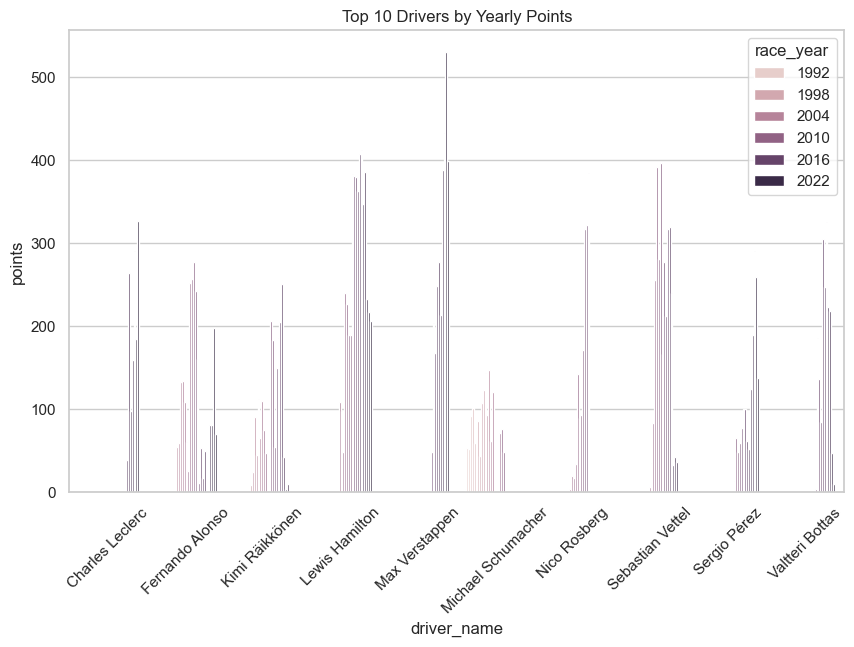

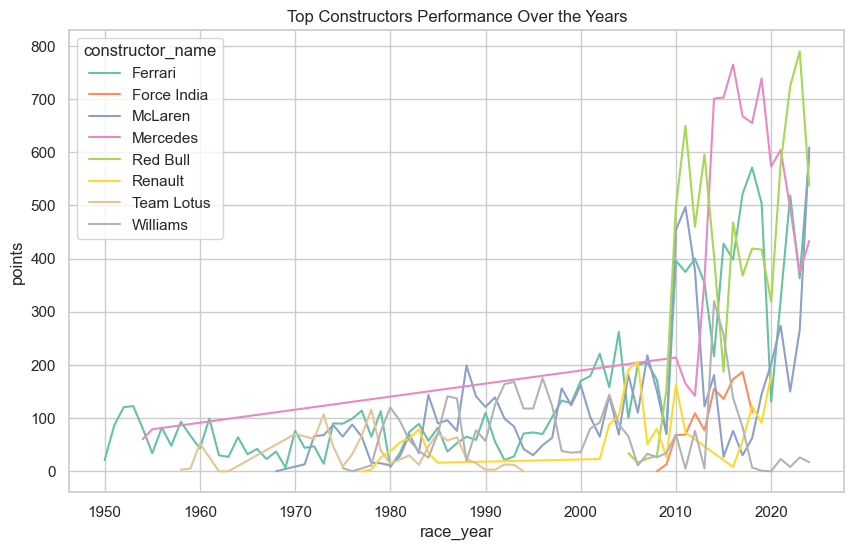

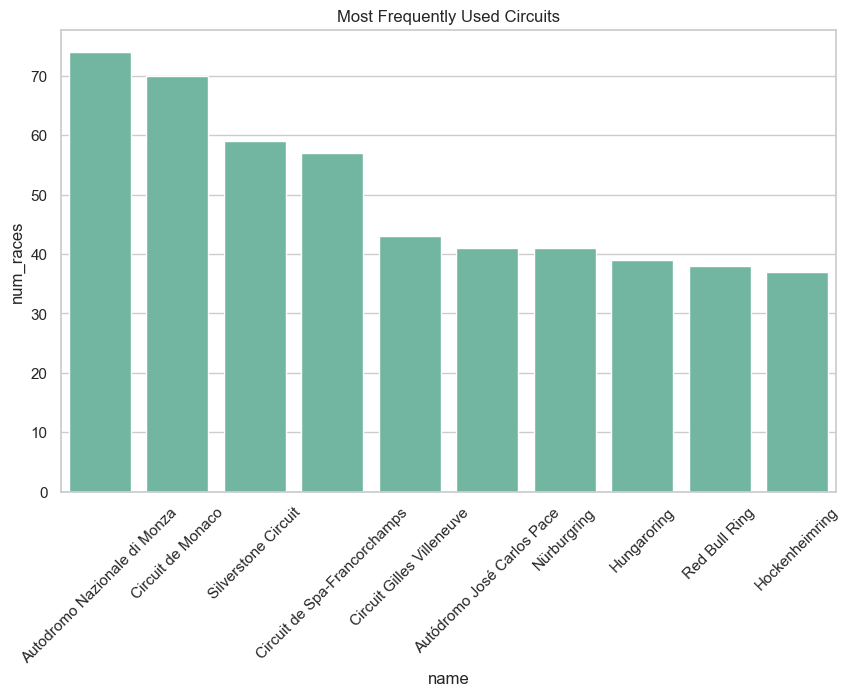

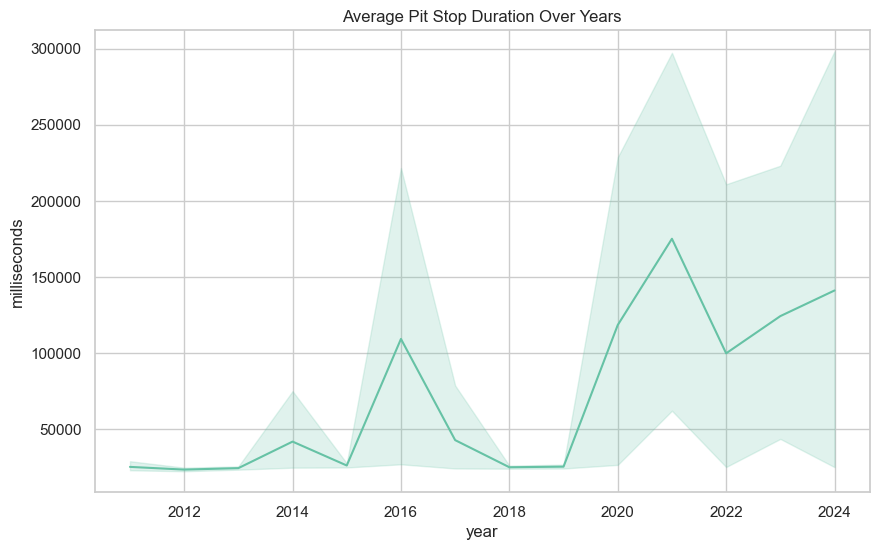

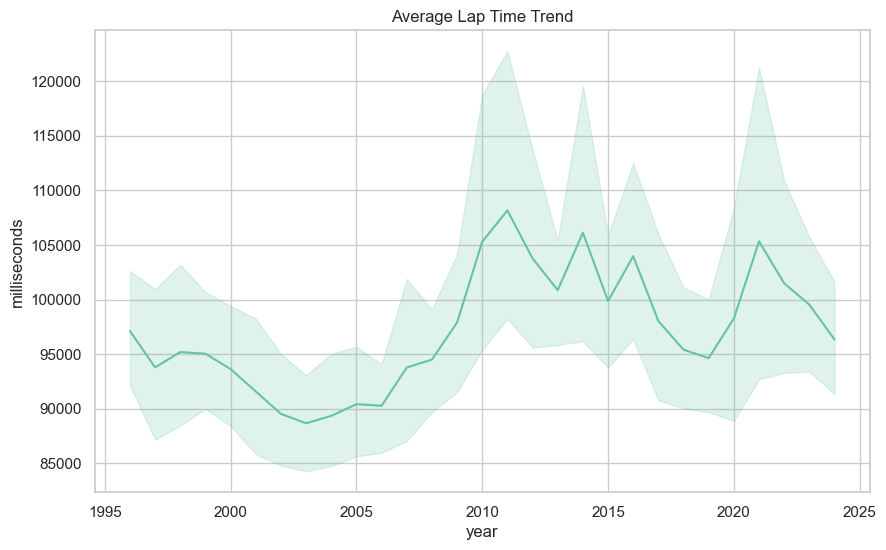

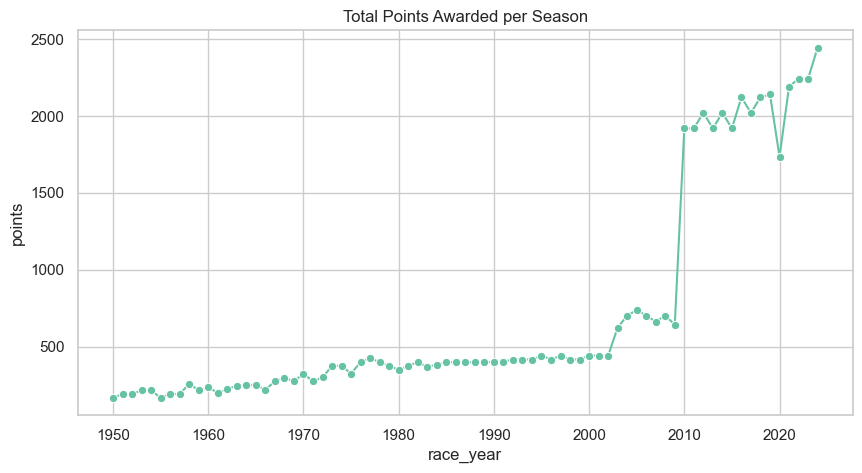

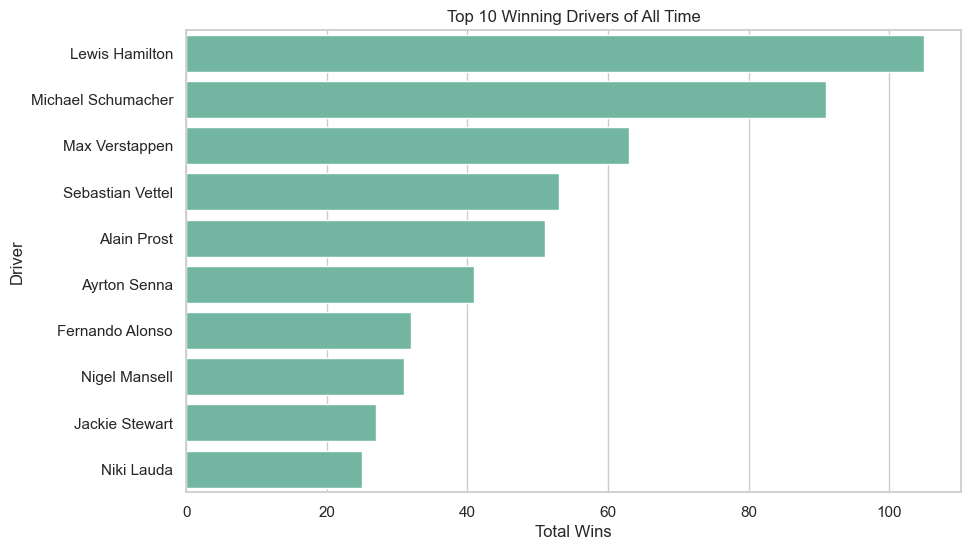

In [7]:
# --- Display Settings ---
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="Set2")

print("Races:", races.shape, " | Drivers:", drivers.shape, " | Results:", results.shape)

# --- Preview ---
display(races.head())
display(drivers.head())

# ======================================
# Data Merging
# ======================================

# Merge core tables: results + races + drivers + constructors
merged = (
    results
    .merge(races, on="raceId")
    .merge(drivers, on="driverId")
    .merge(constructors, on="constructorId")
)

# --- Clean columns ---
merged.rename(columns={"name_x": "race_name", "name_y": "constructor_name"}, inplace=True)
merged["race_year"] = merged["year"]
merged["driver_name"] = merged["forename"] + " " + merged["surname"]

# ======================================
# Driver Performance
# ======================================

driver_points = (
    merged.groupby(["driver_name", "race_year"])["points"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,6))
top_drivers = driver_points.groupby("driver_name")["points"].sum().sort_values(ascending=False).head(10).index
sns.barplot(data=driver_points[driver_points["driver_name"].isin(top_drivers)], x="driver_name", y="points", hue="race_year")
plt.xticks(rotation=45)
plt.title("Top 10 Drivers by Yearly Points")
plt.show()

# Interactive alternative:
fig = px.bar(driver_points, x="race_year", y="points", color="driver_name",
             title="Driver Points Over Seasons")
fig.show()

# ======================================
# Constructor Dominance
# ======================================

constructor_points = (
    merged.groupby(["constructor_name", "race_year"])["points"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10,6))
top_teams = constructor_points.groupby("constructor_name")["points"].sum().sort_values(ascending=False).head(8).index
sns.lineplot(data=constructor_points[constructor_points["constructor_name"].isin(top_teams)],
             x="race_year", y="points", hue="constructor_name")
plt.title("Top Constructors Performance Over the Years")
plt.show()

# ======================================
# Circuit Analysis
# ======================================

race_counts = races["circuitId"].value_counts().reset_index()
race_counts.columns = ["circuitId", "num_races"]
circuit_race_counts = circuits.merge(race_counts, on="circuitId", how="left")

plt.figure(figsize=(10,6))
sns.barplot(data=circuit_race_counts.sort_values("num_races", ascending=False).head(10),
            x="name", y="num_races")
plt.xticks(rotation=45)
plt.title("Most Frequently Used Circuits")
plt.show()

# ======================================
# Pit Stop & Lap Time Insights
# ======================================

if not pit_stops.empty:
    avg_pit = pit_stops.groupby("raceId")["milliseconds"].mean().reset_index()
    avg_pit = avg_pit.merge(races[["raceId", "year", "name"]], on="raceId")
    plt.figure(figsize=(10,6))
    sns.lineplot(data=avg_pit, x="year", y="milliseconds")
    plt.title("Average Pit Stop Duration Over Years")
    plt.show()

if not lap_times.empty:
    lap_summary = lap_times.groupby("raceId")["milliseconds"].mean().reset_index()
    lap_summary = lap_summary.merge(races[["raceId", "year", "name"]], on="raceId")
    plt.figure(figsize=(10,6))
    sns.lineplot(data=lap_summary, x="year", y="milliseconds")
    plt.title("Average Lap Time Trend")
    plt.show()

# ======================================
# Season Summary
# ======================================

season_summary = (
    merged.groupby("race_year")["points"].sum().reset_index()
)
plt.figure(figsize=(10,5))
sns.lineplot(data=season_summary, x="race_year", y="points", marker="o")
plt.title("Total Points Awarded per Season")
plt.show()

# ======================================
# Race Wins Distribution
# ======================================

race_wins = merged[merged["positionOrder"] == 1]
top_winners = race_wins["driver_name"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_winners.values, y=top_winners.index)
plt.title("Top 10 Winning Drivers of All Time")
plt.xlabel("Total Wins")
plt.ylabel("Driver")
plt.show()




Additional Portion

# For each circuit, who dominates (lap time + placing)

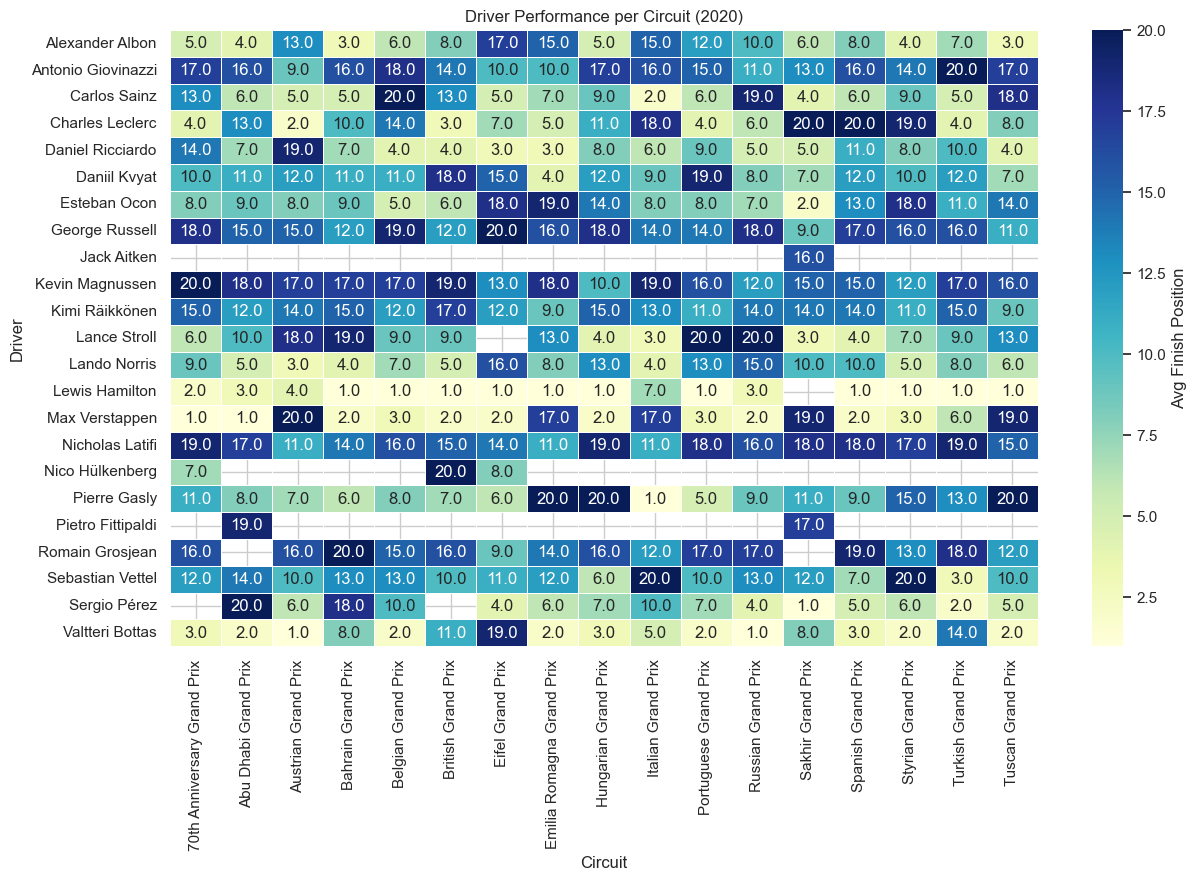

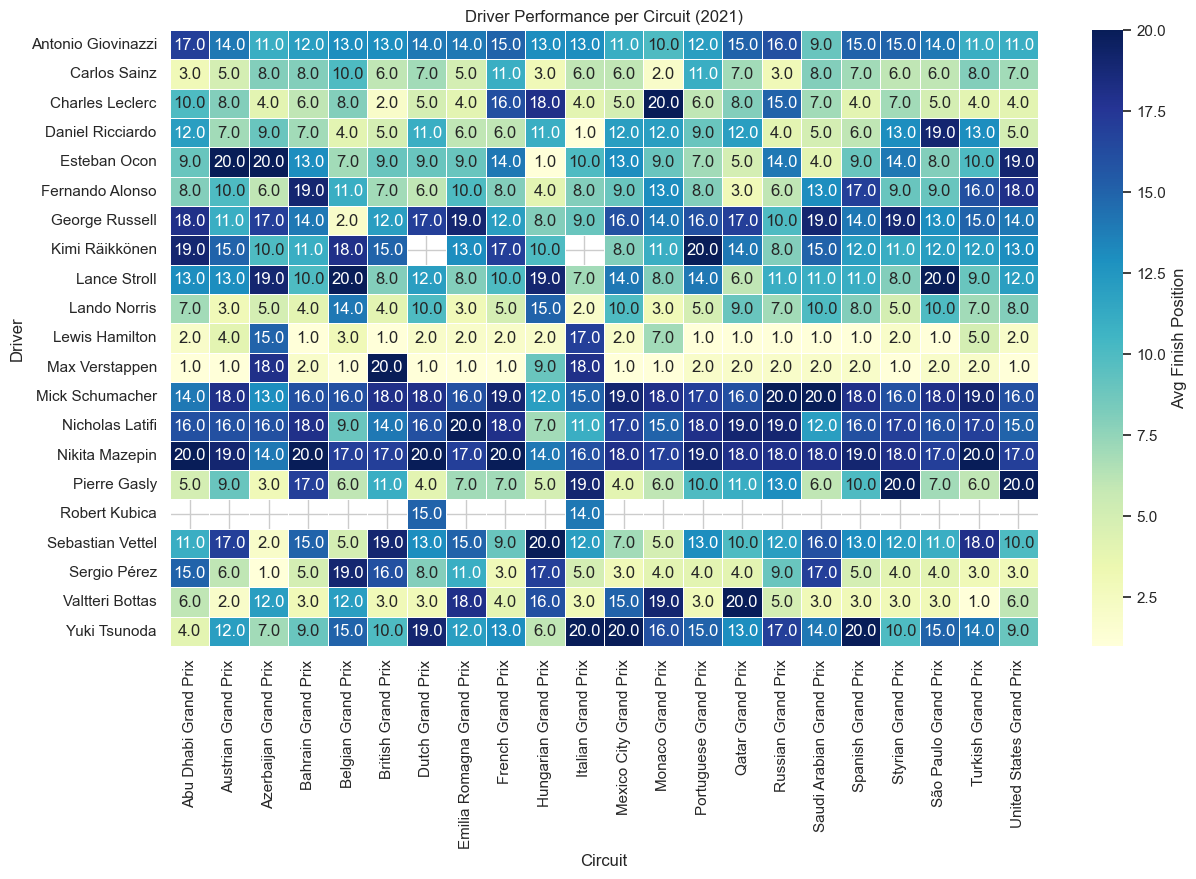

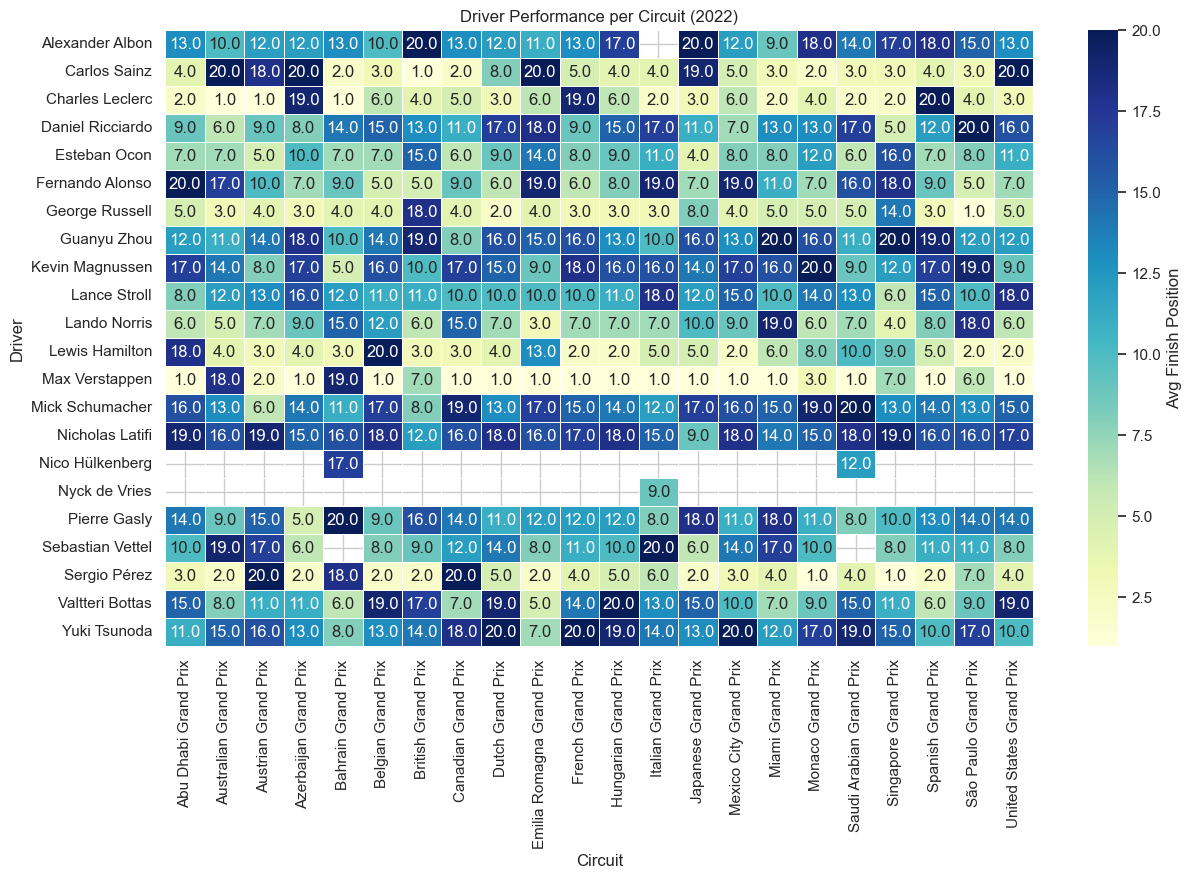

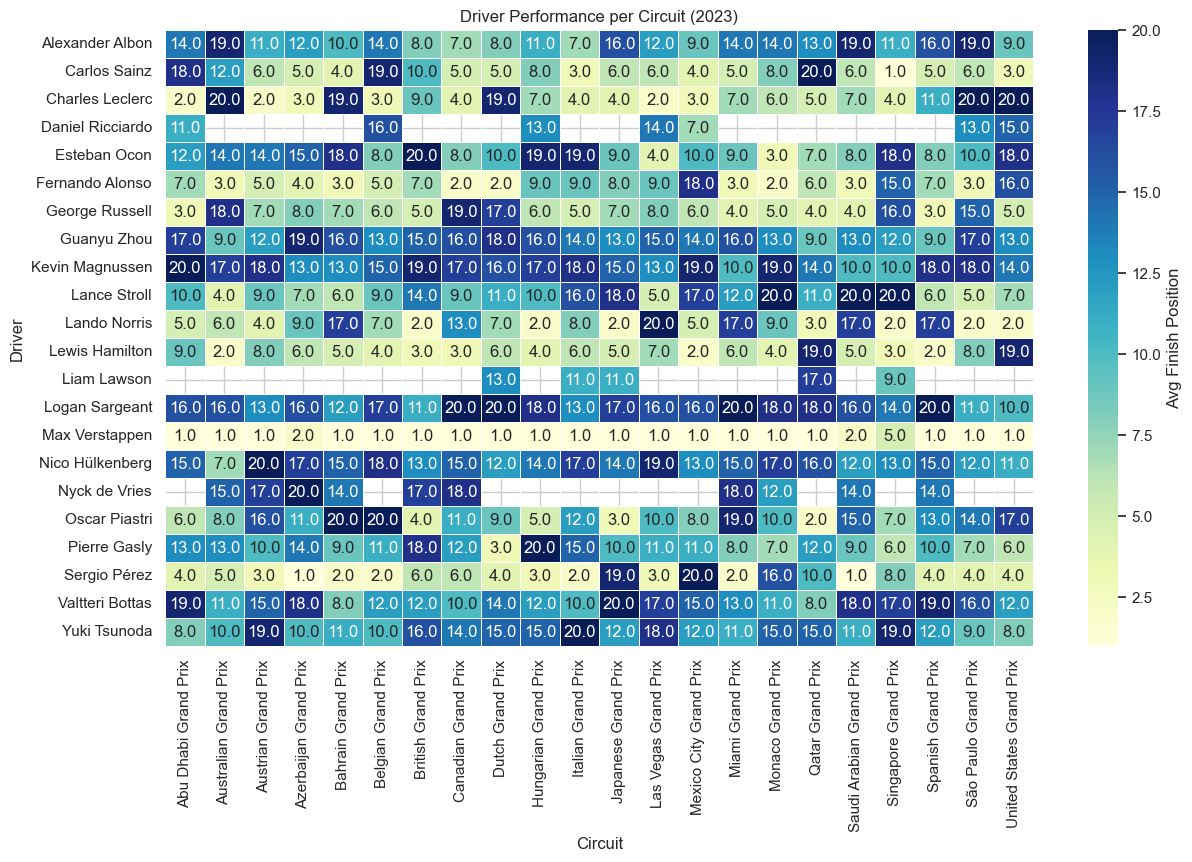

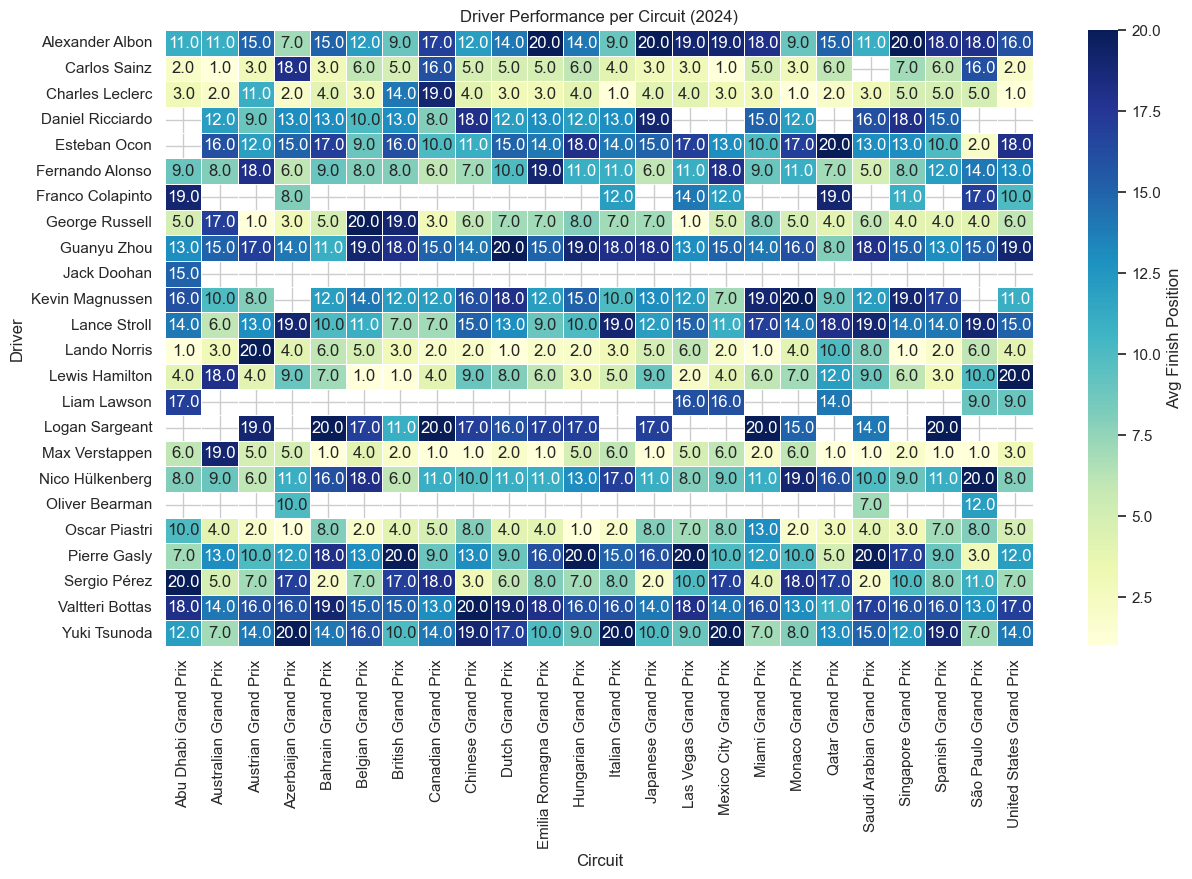

In [19]:
years = range(2020, 2025)

for yr in years:
    # Filter races for this year
    races_year = races[races['year'] == yr]
    results_year = results[results['raceId'].isin(races_year['raceId'])]
    
    # Merge with drivers and circuits
    merged_year = results_year.merge(
        races_year[['raceId','circuitId','name']], on='raceId'
    ).merge(
        drivers[['driverId','forename','surname']], on='driverId'
    )
    
    # Driver full name
    merged_year['driver_name'] = merged_year['forename'] + ' ' + merged_year['surname']
    
    # Average finish per driver per circuit
    driver_circuit_perf = (
        merged_year.groupby(['driver_name','name'])['positionOrder']
        .mean()
        .reset_index()
    )
    
    # Pivot for heatmap
    heatmap_data = driver_circuit_perf.pivot(index='driver_name', columns='name', values='positionOrder')
    
    # Plot
    plt.figure(figsize=(14,8))
    sns.heatmap(
        heatmap_data,
        annot=True, fmt=".1f", cmap="YlGnBu",
        cbar_kws={'label':'Avg Finish Position'},
        linewidths=0.5
    )
    plt.title(f"Driver Performance per Circuit ({yr})")
    plt.xlabel("Circuit")
    plt.ylabel("Driver")
    plt.show()


## For each circuit, who dominates over the years

In [21]:
# ======================================
# Extract all circuits for years 2020-2024
# ======================================

years = range(2020, 2025)
races_filtered = races[races['year'].isin(years)]

# Get unique circuits in this period
unique_circuits = races_filtered[['circuitId','name']].drop_duplicates().reset_index(drop=True)

# Display
print("Circuits from 2020-2024:")
display(unique_circuits)


Circuits from 2020-2024:


,circuitId,name
0,70,Austrian Grand Prix
1,70,Styrian Grand Prix
2,11,Hungarian Grand Prix
3,9,British Grand Prix
4,9,70th Anniversary Grand Prix
5,4,Spanish Grand Prix
6,13,Belgian Grand Prix
7,14,Italian Grand Prix
8,76,Tuscan Grand Prix
9,71,Russian Grand Prix


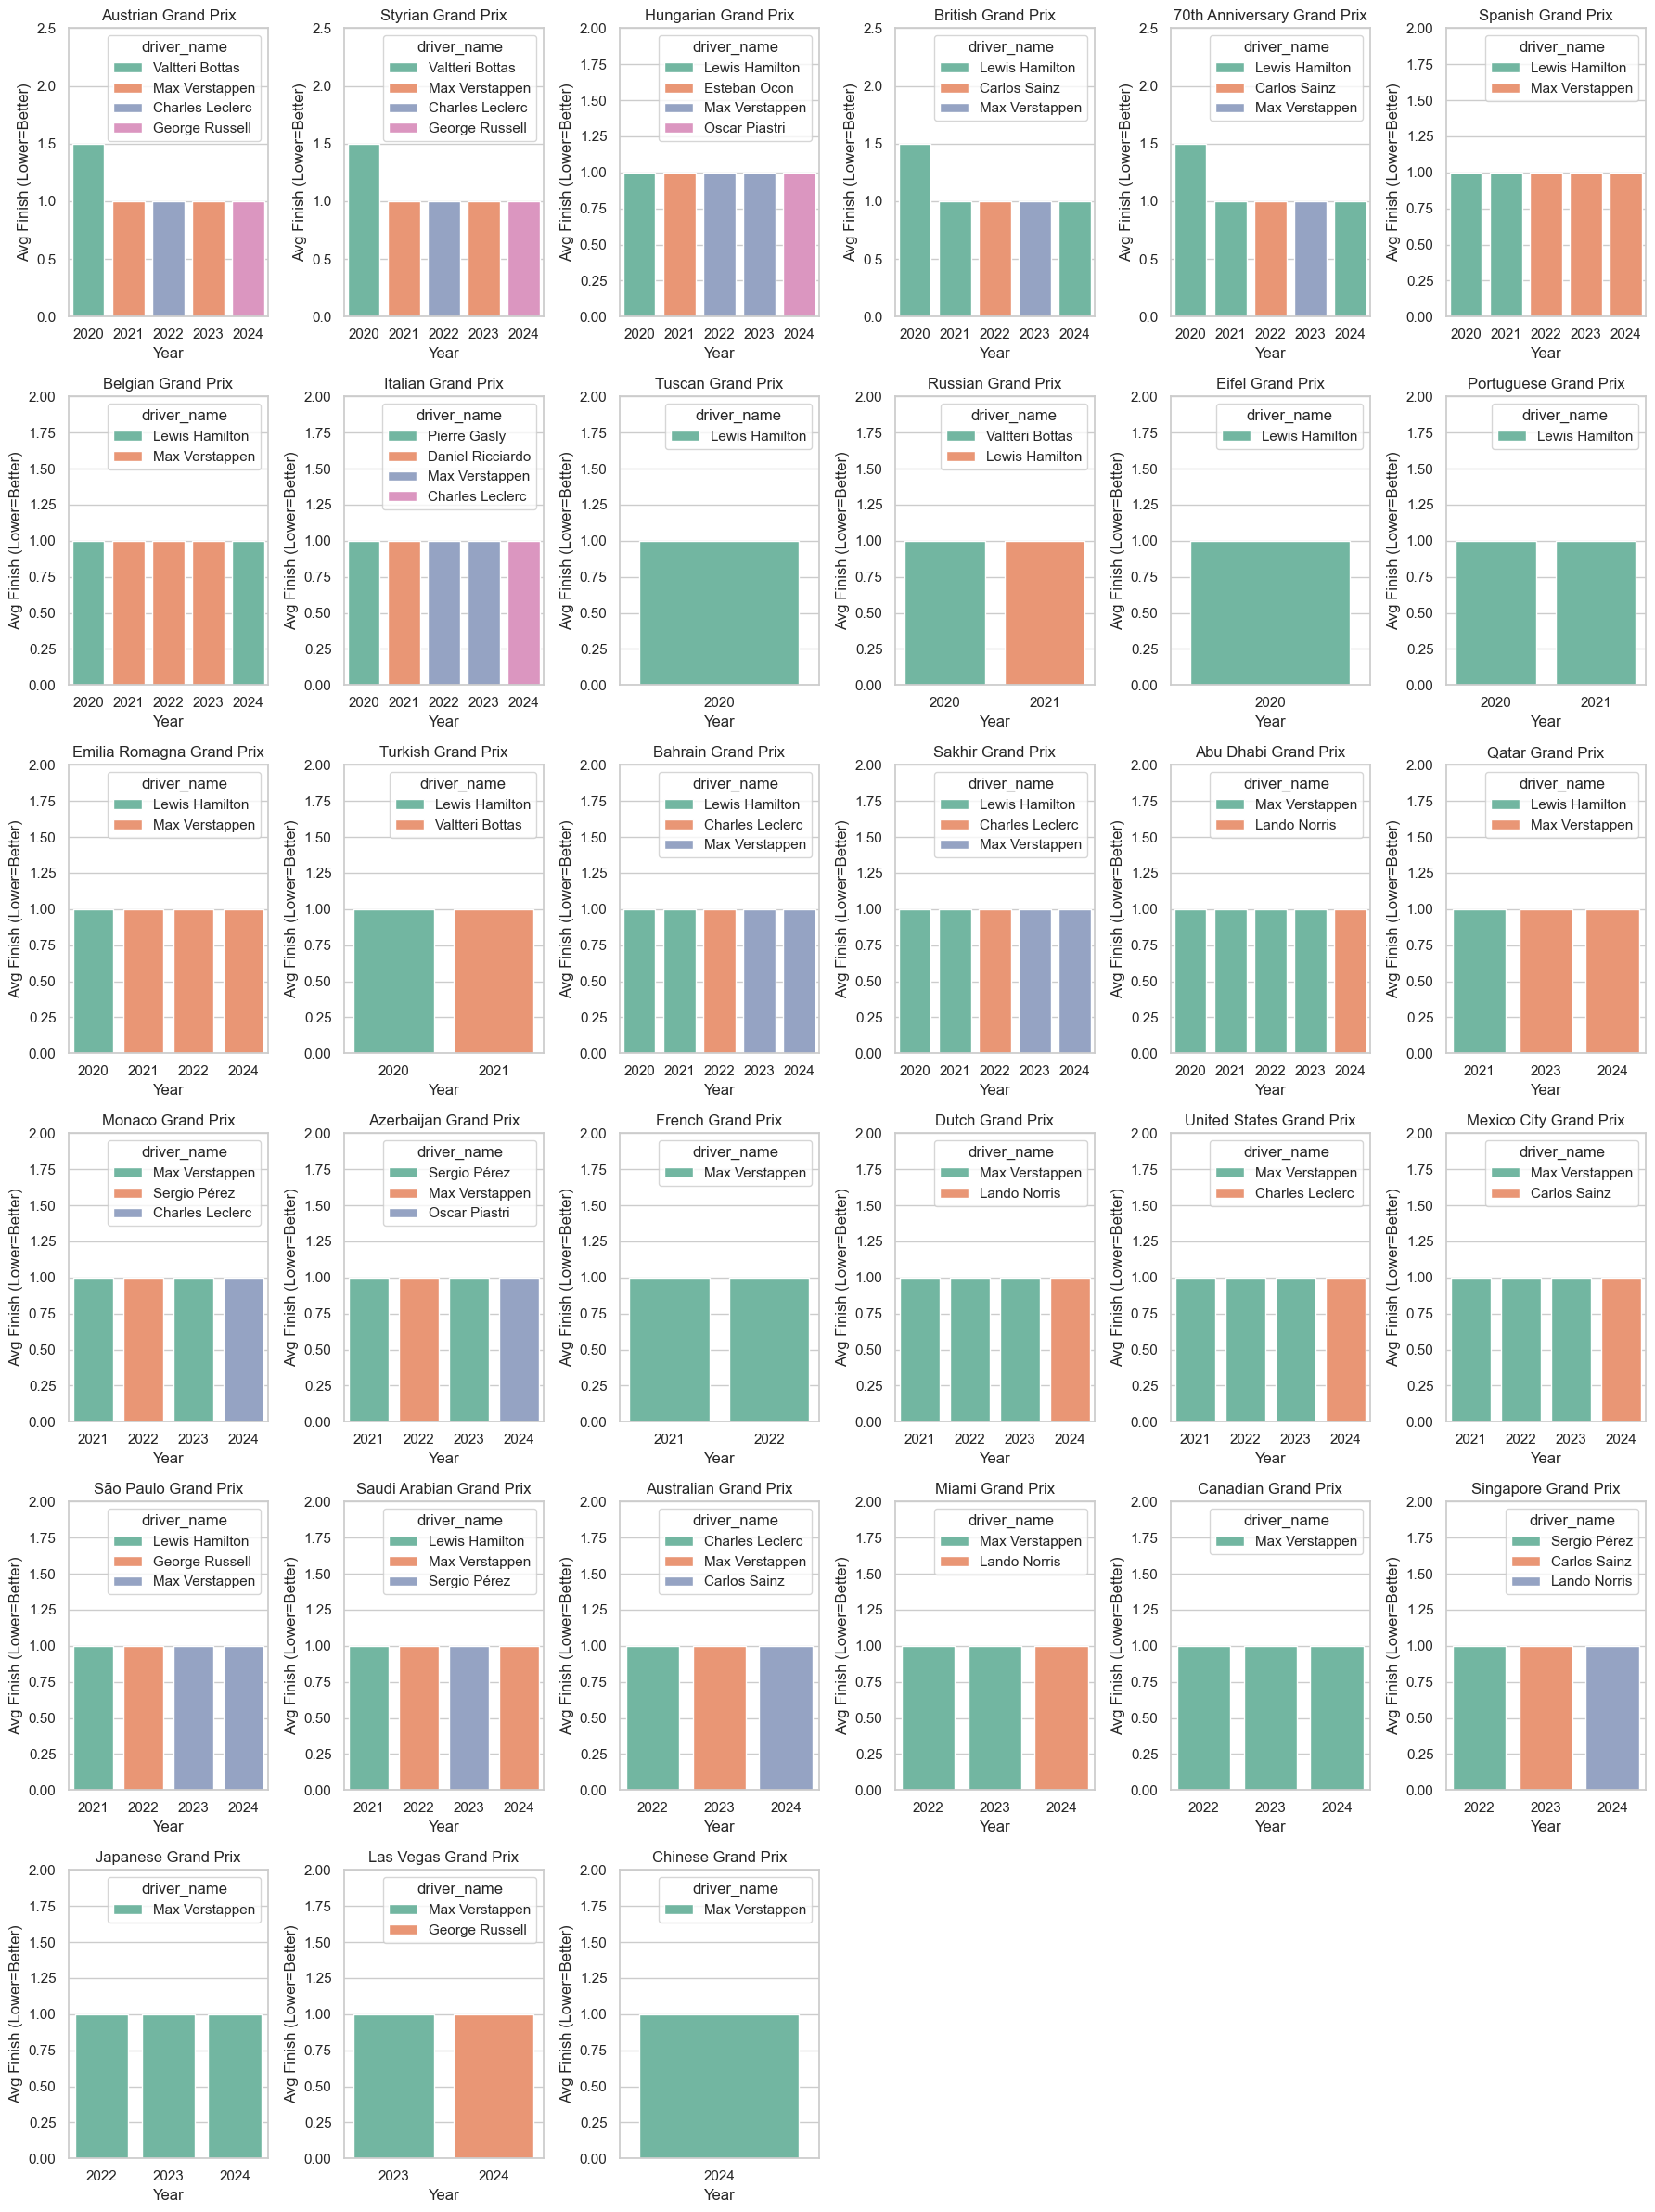

In [27]:
# --- Settings ---
years = range(2020, 2025)
races_filtered = races[races['year'].isin(years)]
unique_circuits = races_filtered[['circuitId','name']].drop_duplicates().reset_index(drop=True)
num_cols = 6
num_circuits = len(unique_circuits)
num_rows = math.ceil(num_circuits / num_cols)

# --- Create subplots ---
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows*4), squeeze=False)
axes = axes.flatten()

for idx, row in unique_circuits.iterrows():
    ax = axes[idx]
    circuit_id = row['circuitId']
    circuit_name = row['name']
    
    # Filter races for this circuit
    circuit_races = races_filtered[races_filtered['circuitId'] == circuit_id]
    
    top_drivers = []
    for yr in years:
        races_year = circuit_races[circuit_races['year'] == yr]
        results_year = results[results['raceId'].isin(races_year['raceId'])]
        merged_year = results_year.merge(drivers[['driverId','forename','surname']], on='driverId')
        merged_year['driver_name'] = merged_year['forename'] + ' ' + merged_year['surname']
        
        if not merged_year.empty:
            driver_avg = merged_year.groupby('driver_name')['positionOrder'].mean().reset_index()
            top_driver = driver_avg.loc[driver_avg['positionOrder'].idxmin()]
            top_driver['year'] = yr
            top_drivers.append(top_driver)
    
    top_drivers_df = pd.DataFrame(top_drivers)
    
    if not top_drivers_df.empty:
        sns.barplot(
            data=top_drivers_df, 
            x='year', 
            y='positionOrder', 
            hue='driver_name', 
            ax=ax
        )
        ax.set_title(circuit_name)
        ax.set_ylabel("Avg Finish (Lower=Better)")
        ax.set_xlabel("Year")
        ax.set_ylim(0, top_drivers_df['positionOrder'].max()+1)
    else:
        ax.axis('off')  # hide axes if no data

# Remove any extra empty subplots
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
